<a href="https://colab.research.google.com/github/anoushka-r/HeartDisease-prediction/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [16]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['dataset (3).csv']))


Saving dataset.csv to dataset (3).csv


In [17]:
X = data.drop('target', axis=1)
y = data['target']


In [18]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, you can impute them
imputer = SimpleImputer(strategy='mean')
data[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']] = imputer.fit_transform(
    data[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']])


age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


In [19]:
# One-Hot Encoding for Categorical Variables
data = pd.get_dummies(data, columns=['chest pain type', 'resting ecg', 'ST slope'], drop_first=True)


In [20]:
# Columns to normalize
columns_to_scale = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

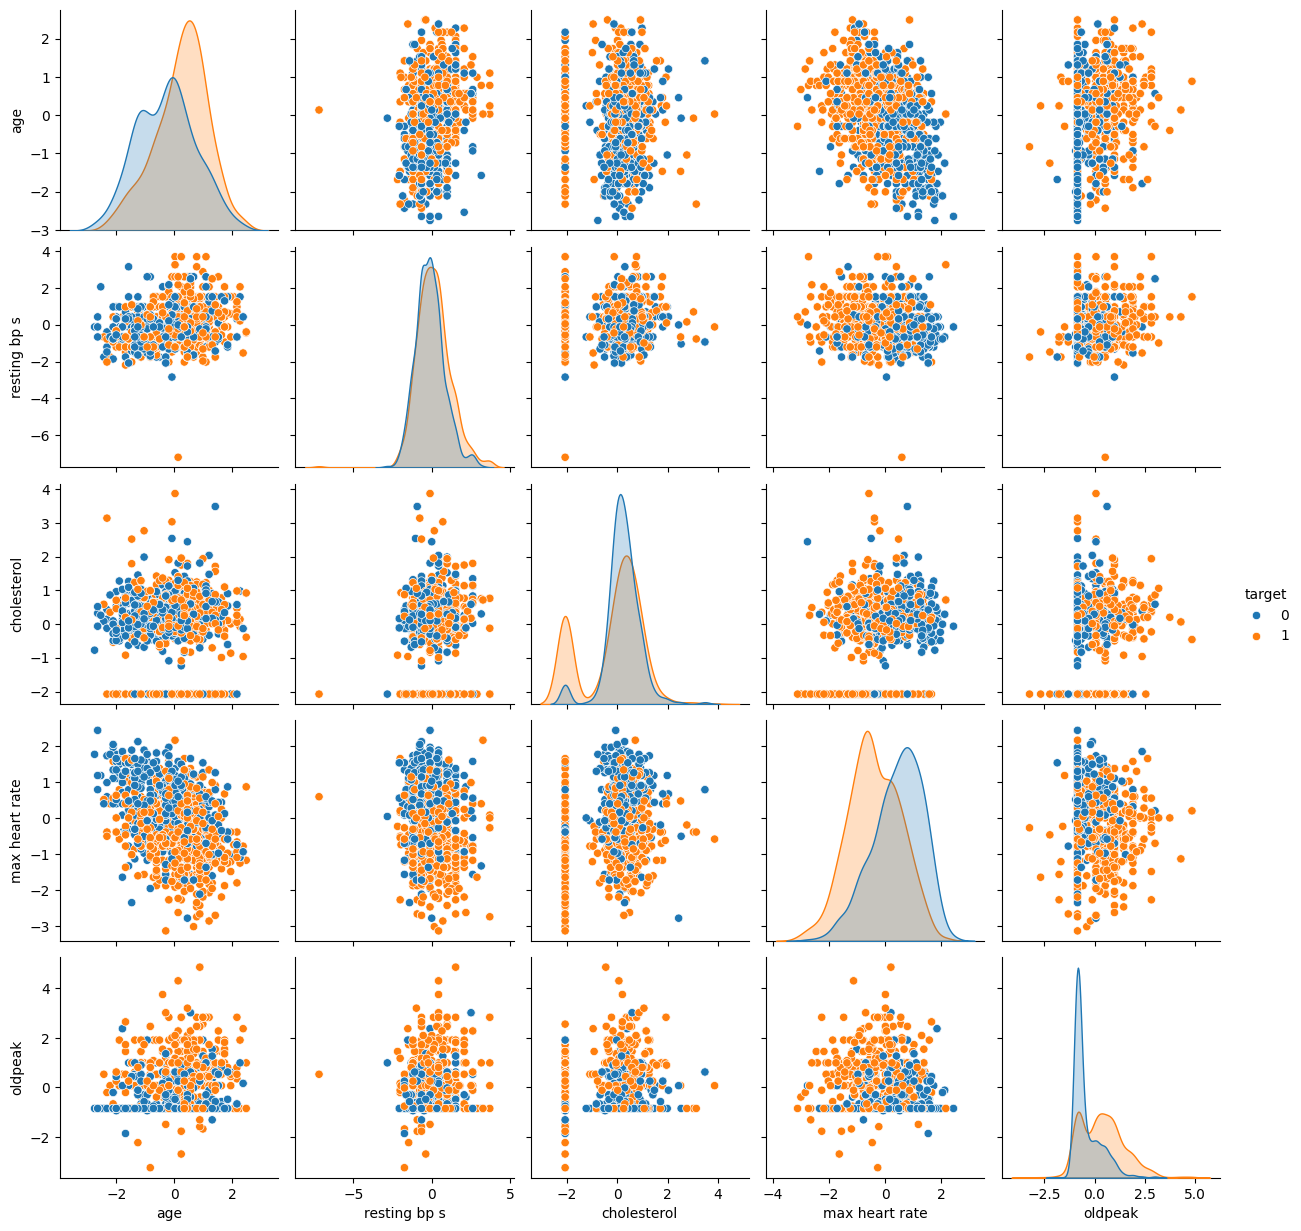

In [21]:
sns.pairplot(data[['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak', 'target']], hue='target')
plt.show()


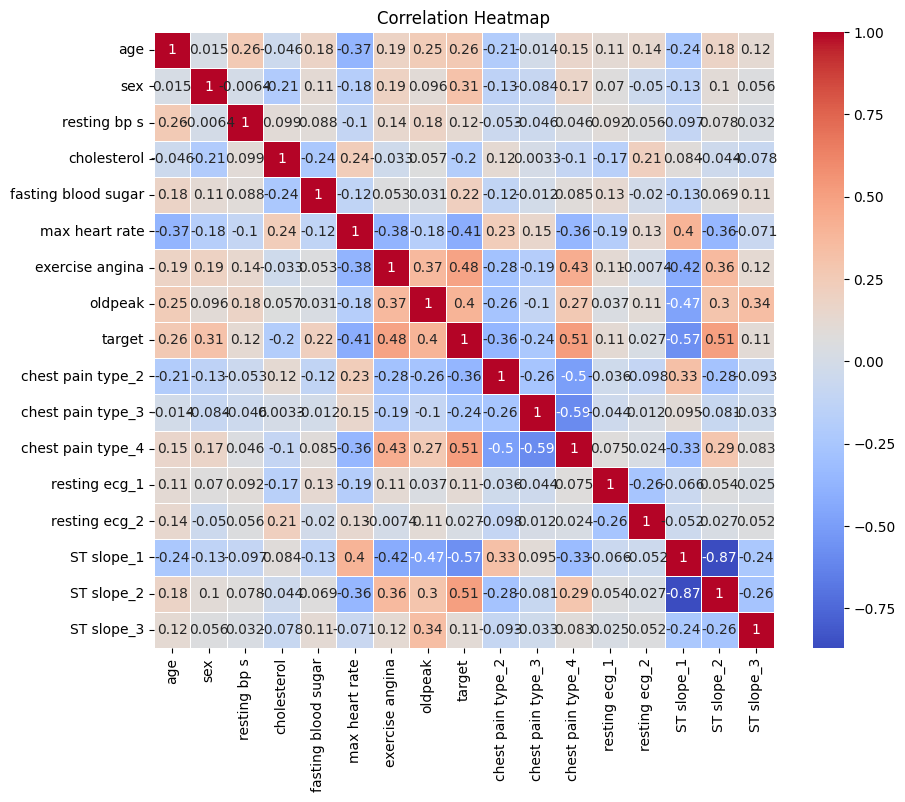

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


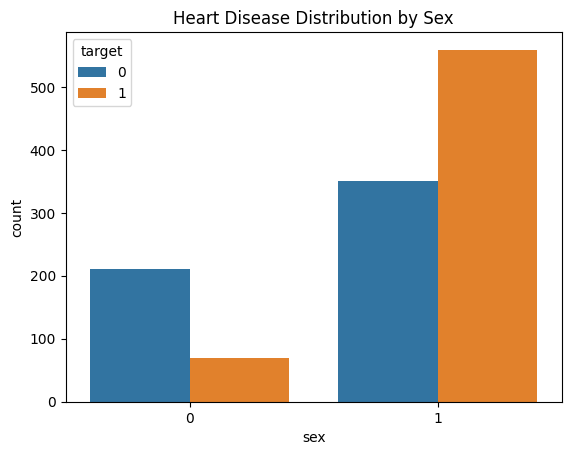

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


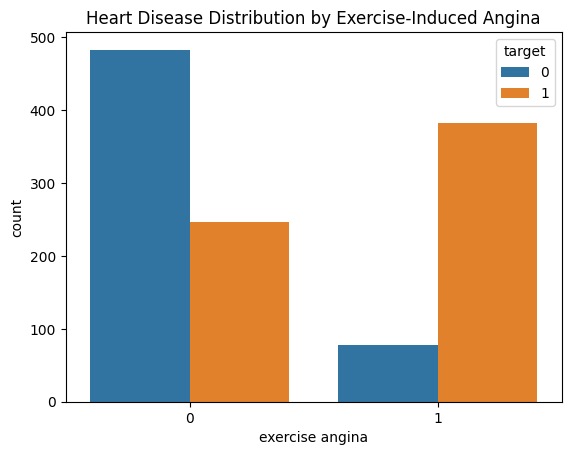

In [23]:
# Sex distribution
sns.countplot(x='sex', hue='target', data=data)
plt.title('Heart Disease Distribution by Sex')
plt.show()

# Exercise-induced angina
sns.countplot(x='exercise angina', hue='target', data=data)
plt.title('Heart Disease Distribution by Exercise-Induced Angina')
plt.show()


In [24]:
print(data.head())


        age  sex  resting bp s  cholesterol  fasting blood sugar  \
0 -1.466728    1      0.427328     0.775674                    0   
1 -0.504600    0      1.516587    -0.299512                    0   
2 -1.787437    1     -0.117301     0.716489                    0   
3 -0.611503    0      0.318402     0.035867                    0   
4  0.029915    1      0.971958    -0.151550                    0   

   max heart rate  exercise angina   oldpeak  target  chest pain type_2  \
0        1.265039                0 -0.849792       0               True   
1        0.637758                0  0.071119       1              False   
2       -1.636136                0 -0.849792       0               True   
3       -1.244085                1  0.531575       1              False   
4       -0.695214                0 -0.849792       0              False   

   chest pain type_3  chest pain type_4  resting ecg_1  resting ecg_2  \
0              False              False          False          Fal

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.957983193277311
Precision: 0.9481481481481482
Recall: 0.9770992366412213
F1 Score: 0.9624060150375939
ROC AUC Score: 0.9714275522579725

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       107
           1       0.95      0.98      0.96       131

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238



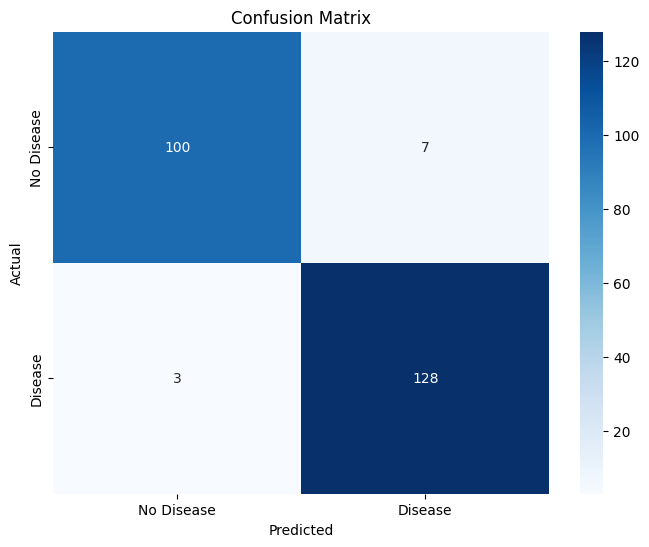

In [34]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # ROC AUC score

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
# Set your thresholds
thresholds = {
    'accuracy': 0.80,
    'precision': 0.75,
    'recall': 0.75,
    'f1_score': 0.70,
    'roc_auc': 0.80,
}

# Check if the model meets the thresholds
print("Performance Evaluation Against Thresholds:")
print("==========================================")
print("Accuracy:", accuracy, " | Threshold:", thresholds['accuracy'], " | Status:", "Pass" if accuracy >= thresholds['accuracy'] else "Fail")
print("Precision:", precision, " | Threshold:", thresholds['precision'], " | Status:", "Pass" if precision >= thresholds['precision'] else "Fail")
print("Recall:", recall, " | Threshold:", thresholds['recall'], " | Status:", "Pass" if recall >= thresholds['recall'] else "Fail")
print("F1 Score:", f1, " | Threshold:", thresholds['f1_score'], " | Status:", "Pass" if f1 >= thresholds['f1_score'] else "Fail")
print("ROC AUC Score:", roc_auc, " | Threshold:", thresholds['roc_auc'], " | Status:", "Pass" if roc_auc >= thresholds['roc_auc'] else "Fail")


Performance Evaluation Against Thresholds:
Accuracy: 0.957983193277311  | Threshold: 0.8  | Status: Pass
Precision: 0.9481481481481482  | Threshold: 0.75  | Status: Pass
Recall: 0.9770992366412213  | Threshold: 0.75  | Status: Pass
F1 Score: 0.9624060150375939  | Threshold: 0.7  | Status: Pass
ROC AUC Score: 0.9714275522579725  | Threshold: 0.8  | Status: Pass


In [35]:
import joblib

# Save the model to a file
joblib.dump(model, 'heart_disease_model.pkl')

# Download the model file
from google.colab import files
files.download('heart_disease_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>